# Experimentación métodos iterativos

In [129]:
import numpy as np
import subprocess as sp
import json
import matplotlib.pyplot as plt

dir = "../data"

## Funciones auxiliares

In [89]:
n = 8

def correr_algoritmo(dataset, tipo, tam, metodo, iteraciones=0, tol=0):        
    proceso = sp.run(["../src/iterativo", f"{dir}/{dataset}/matriz_{tipo}_{tam}.txt", metodo, str(iteraciones), str(tol)], capture_output=True, text=True)
    proceso.check_returncode()

    return np.array(proceso.stdout.split(" "), dtype=np.float64)

def cargar_soluciones(tipo, xs):
    for i in range(2, n + 1):
        tam = 2 ** i
        xs.append(np.genfromtxt(f"{dir}/{tipo}/vector_x_{tam}.txt"))

def cargar_soluciones_metodos(metodo):
    with open(f"{dir}/resultados_{metodo}.json", "r") as input:
        return json.load(input)
    
def guardar_resultados(data, nombre_archivo):
    with open(f"{dir}/{nombre_archivo}.json", "w") as output:
        json.dump(data, output)

## Correr experimentos

In [90]:
max_iter = 150
step = 10
tolerancia = 1e-10

datasets = ["chico", "mediano", "grande"]
tipos = ["edd", "sim", "triang"]

## Soluciones de los métodos

### Jacobi

In [91]:
resultados_jacobi = {}
for ds in datasets:
    resultados_jacobi[f"{ds}"] = {}
    for tipo in tipos:
        resultados_jacobi[f"{ds}"][f"{tipo}"] = []
        for i in range(2, n + 1):
            for j in range(1, max_iter + 1, step):
                res = correr_algoritmo(ds, tipo, 2 ** i, "J", j, tolerancia)
                resultados_jacobi[f"{ds}"][f"{tipo}"].append(res.tolist())

In [92]:
guardar_resultados(resultados_jacobi, "resultados_jacobi")

### Jacobi Sumatoria

In [93]:
resultados_jacobi_sum = {}
for ds in datasets:
    resultados_jacobi_sum[f"{ds}"] = {}
    for tipo in tipos:
        resultados_jacobi_sum[f"{ds}"][f"{tipo}"] = []
        for i in range(2, n + 1):
            for j in range(1, max_iter + 1, step):
                res = correr_algoritmo(ds, tipo, 2 ** i, "JS", j, tolerancia)
                resultados_jacobi_sum[f"{ds}"][f"{tipo}"].append(res.tolist())

In [94]:
guardar_resultados(resultados_jacobi_sum, "resultados_jacobi_sum")

### Gauss Seidel

In [95]:
resultados_gs = {}
for ds in datasets:
    resultados_gs[f"{ds}"] = {}
    for tipo in tipos:
        resultados_gs[f"{ds}"][f"{tipo}"] = []
        for i in range(2, n + 1):
            for j in range(1, max_iter + 1, step):
                res = correr_algoritmo(ds, tipo, 2 ** i, "GS", j, tolerancia)
                resultados_gs[f"{ds}"][f"{tipo}"].append(res.tolist())

In [96]:
guardar_resultados(resultados_gs, "resultados_gauss_seidel")

### Gauss Seidel Sumatoria

In [97]:
resultados_gs_sum = {}
for ds in datasets:
    resultados_gs_sum[f"{ds}"] = {}
    for tipo in tipos:
        resultados_gs_sum[f"{ds}"][f"{tipo}"] = []
        for i in range(2, n + 1):
            for j in range(1, max_iter + 1, step):
                res = correr_algoritmo(ds, tipo, 2 ** i, "GSS", j, tolerancia)
                resultados_gs_sum[f"{ds}"][f"{tipo}"].append(res.tolist())

In [98]:
guardar_resultados(resultados_gs_sum, "resultados_gauss_seidel_sum")

### LU

In [99]:
resultados_lu = {}
for ds in datasets:
    resultados_lu[f"{ds}"] = {}
    for tipo in tipos:
        resultados_lu[f"{ds}"][f"{tipo}"] = []
        for i in range(2, n + 1):
            res = correr_algoritmo(ds, tipo, 2 ** i, "LU")
            resultados_lu[f"{ds}"][f"{tipo}"].append(res.tolist())

In [100]:
guardar_resultados(resultados_lu, "resultados_lu")

## Cargar vectores solución

In [101]:
xs_chico = []
xs_mediano = []
xs_grande = []

cargar_soluciones("chico", xs_chico)
cargar_soluciones("mediano", xs_mediano)
cargar_soluciones("grande", xs_grande)

## Cargar soluciones métodos

In [102]:
sol_j = cargar_soluciones_metodos("jacobi")
sol_js = cargar_soluciones_metodos("jacobi_sum")
sol_gs = cargar_soluciones_metodos("gauss_seidel")
sol_gss = cargar_soluciones_metodos("gauss_seidel_sum")
sol_lu = cargar_soluciones_metodos("lu")

## Generación de Gráficos

### Error

In [103]:
# errores = {}
# offset = (max_iter + 1) // step 
# for tipo in sol_j["chico"].values():
#     j = 0
#     for solucion in xs_chico:
#         n = len(solucion)
#         errores[f"{n}"] = []
#         for i in range((max_iter + 1) // step):
#             errores[f"{n}"].append(np.linalg.norm(solucion - np.array(tipo[i + j * offset], dtype=np.float64)))
#         j += 1

# errores

In [126]:
jacobi_separados = {}
gs_separados = {}
jacobi_sum_separados = {}
gs_sum_separados = {}


# separamos los resultados por tamaño de matriz
for ds in datasets:
    jacobi_separados[f"{ds}"] = {}
    gs_separados[f"{ds}"] = {}
    jacobi_sum_separados[f"{ds}"] = {}
    gs_sum_separados[f"{ds}"] = {}
    for tipo in tipos:
        jacobi_separados[f"{ds}"][f"{tipo}"] = {}
        gs_separados[f"{ds}"][f"{tipo}"]  = {}
        jacobi_sum_separados[f"{ds}"][f"{tipo}"]  = {}
        gs_sum_separados[f"{ds}"][f"{tipo}"]  = {}
        for i in range(2, n+1):
            jacobi_separados[f"{ds}"][f"{tipo}"][f"{2**i}"] = []
            gs_separados[f"{ds}"][f"{tipo}"][f"{2**i}"]  = []
            jacobi_sum_separados[f"{ds}"][f"{tipo}"][f"{2**i}"]  = []
            gs_sum_separados[f"{ds}"][f"{tipo}"][f"{2**i}"]  = []
            for sol in sol_j[f"{ds}"][f"{tipo}"]:
                if len(sol) == 2**i:
                    jacobi_separados[f"{ds}"][f"{tipo}"][f"{2**i}"].append(sol)
            for sol in sol_gs[f"{ds}"][f"{tipo}"]:
                if len(sol) == 2**i:
                    gs_separados[f"{ds}"][f"{tipo}"][f"{2**i}"].append(sol)
            for sol in sol_js[f"{ds}"][f"{tipo}"]:
                if len(sol) == 2**i:
                    jacobi_sum_separados[f"{ds}"][f"{tipo}"][f"{2**i}"].append(sol)
            for sol in sol_gss[f"{ds}"][f"{tipo}"]:
                if len(sol) == 2**i:
                    gs_sum_separados[f"{ds}"][f"{tipo}"][f"{2**i}"].append(sol)
                
errores_jacobi = {}
errores_gs = {}
errores_jacobi_sum = {}
errores_gs_sum = {}

for ds in datasets:
    errores_jacobi[f"{ds}"] = {}
    errores_gs[f"{ds}"] = {}
    errores_jacobi_sum[f"{ds}"] = {}
    errores_gs_sum[f"{ds}"] = {}
    for tipo in tipos:
        errores_jacobi[f"{ds}"][f"{tipo}"] = {}
        errores_gs[f"{ds}"][f"{tipo}"] = {}
        errores_jacobi_sum[f"{ds}"][f"{tipo}"] = {}
        errores_gs_sum[f"{ds}"][f"{tipo}"] = {}
        if ds == "chico":
            for sol in xs_chico:
                errores_jacobi[f"{ds}"][f"{tipo}"][f"{len(sol)}"] = []
                errores_gs[f"{ds}"][f"{tipo}"][f"{len(sol)}"] = []
                errores_jacobi_sum[f"{ds}"][f"{tipo}"][f"{len(sol)}"] = []
                errores_gs_sum[f"{ds}"][f"{tipo}"][f"{len(sol)}"] = []

                for x in jacobi_separados[f"{ds}"][f"{tipo}"][f"{len(sol)}"]:
                    errores_jacobi[f"{ds}"][f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
                for x in gs_separados[f"{ds}"][f"{tipo}"][f"{len(sol)}"]:
                    errores_gs[f"{ds}"][f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
                for x in jacobi_sum_separados[f"{ds}"][f"{tipo}"][f"{len(sol)}"]:
                    errores_jacobi_sum[f"{ds}"][f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
                for x in gs_sum_separados[f"{ds}"][f"{tipo}"][f"{len(sol)}"]:
                    errores_gs_sum[f"{ds}"][f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
        elif ds == "mediano":
            for sol in xs_mediano:
                errores_jacobi[f"{ds}"][f"{tipo}"][f"{len(sol)}"] = []
                errores_gs[f"{ds}"][f"{tipo}"][f"{len(sol)}"] = []
                errores_jacobi_sum[f"{ds}"][f"{tipo}"][f"{len(sol)}"] = []
                errores_gs_sum[f"{ds}"][f"{tipo}"][f"{len(sol)}"] = []
                
                for x in jacobi_separados[f"{ds}"][f"{tipo}"][f"{len(sol)}"]:
                    errores_jacobi[f"{ds}"][f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
                for x in gs_separados[f"{ds}"][f"{tipo}"][f"{len(sol)}"]:
                    errores_gs[f"{ds}"][f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
                for x in jacobi_sum_separados[f"{ds}"][f"{tipo}"][f"{len(sol)}"]:
                    errores_jacobi_sum[f"{ds}"][f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
                for x in gs_sum_separados[f"{ds}"][f"{tipo}"][f"{len(sol)}"]:
                    errores_gs_sum[f"{ds}"][f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
        elif ds == "grande":
            for sol in xs_grande:
                errores_jacobi[f"{ds}"][f"{tipo}"][f"{len(sol)}"] = []
                errores_gs[f"{ds}"][f"{tipo}"][f"{len(sol)}"] = []
                errores_jacobi_sum[f"{ds}"][f"{tipo}"][f"{len(sol)}"] = []
                errores_gs_sum[f"{ds}"][f"{tipo}"][f"{len(sol)}"] = []
                
                for x in jacobi_separados[f"{ds}"][f"{tipo}"][f"{len(sol)}"]:
                    errores_jacobi[f"{ds}"][f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
                for x in gs_separados[f"{ds}"][f"{tipo}"][f"{len(sol)}"]:
                    errores_gs[f"{ds}"][f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
                for x in jacobi_sum_separados[f"{ds}"][f"{tipo}"][f"{len(sol)}"]:
                    errores_jacobi_sum[f"{ds}"][f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))
                for x in gs_sum_separados[f"{ds}"][f"{tipo}"][f"{len(sol)}"]:
                    errores_gs_sum[f"{ds}"][f"{tipo}"][f"{len(sol)}"].append(np.linalg.norm(x-sol))

errores_jacobi

{'chico': {'edd': {'4': [4.020167135107694,
    0.007875563471904582,
    1.732050807528945e-05,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0],
   '8': [9.015226710044512,
    0.8396249785469697,
    0.07947441789657847,
    0.007520744643983185,
    0.0007168681887209863,
    7.211102550904398e-05,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0],
   '16': [15.051752995840719,
    3.6010160298755967,
    0.8642071059422041,
    0.20740141511149413,
    0.049778140590423736,
    0.011947116944686335,
    0.0028661905283563676,
    0.00069258920548582,
    0.00016269970751964013,
    3.988099239041951e-05,
    2.28298e-06,
    5.47894e-07,
    1.31489e-07,
    3.15561e-08,
    7.57316e-09],
   '32': [22.509539321374394,
    11.724025806287703,
    6.110523007779285,
    3.184798444924576,
    1.6599155477577767,
    0.8651416941750064,
    0.45090520106500265,
    0.2350097919795902,
    0.1224

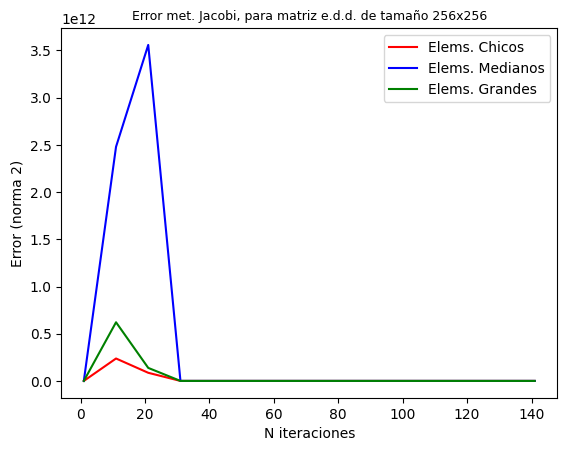

In [207]:
errores_chico = errores_jacobi["chico"]["triang"]["32"]
errores_mediano = errores_jacobi["mediano"]["triang"]["32"]
errores_grande = errores_jacobi["grande"]["triang"]["32"]

its = range(1,max_iter + 1,step)

_, ax = plt.subplots()
ax.plot(its,errores_chico, c="red", label="Elems. Chicos")
ax.plot(its,errores_mediano, c="blue", label="Elems. Medianos")
ax.plot(its,errores_grande, c="green", label="Elems. Grandes")

plt.xlabel("N iteraciones")
plt.ylabel("Error (norma 2)")
plt.title("Error met. Jacobi, para matriz e.d.d. de tamaño 256x256",fontsize = 9)
plt.legend()
plt.show()

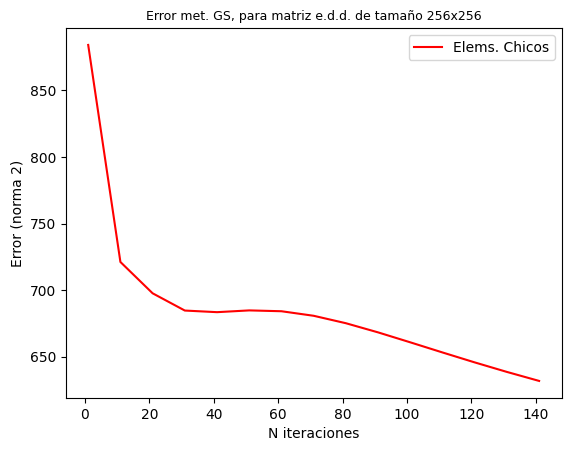

In [202]:
errores_chico = errores_gs["chico"]["sim"]["256"]
errores_mediano = errores_gs["mediano"]["sim"]["256"]
errores_grande = errores_gs["grande"]["sim"]["256"]

its = range(1,max_iter + 1,step)

_, ax = plt.subplots()
ax.plot(its,errores_chico, c="red", label="Elems. Chicos")
ax.plot(its,errores_mediano, c="blue", label="Elems. Medianos")
ax.plot(its,errores_grande, c="green", label="Elems. Grandes")

plt.xlabel("N iteraciones")
plt.ylabel("Error (norma 2)")
plt.title("Error met. GS, para matriz e.d.d. de tamaño 256x256",fontsize = 9)
plt.legend()
plt.show()

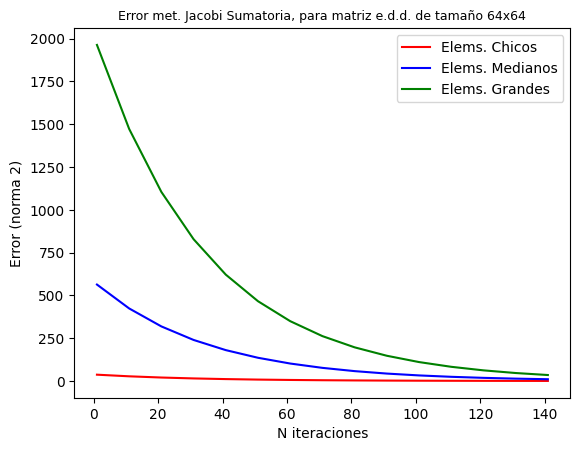

In [192]:
errores_chico = errores_jacobi_sum["chico"]["edd"]["64"]
errores_mediano = errores_jacobi_sum["mediano"]["edd"]["64"]
errores_grande = errores_jacobi_sum["grande"]["edd"]["64"]

its = range(1,max_iter + 1,step)

_, ax = plt.subplots()
ax.plot(its,errores_chico, c="red", label="Elems. Chicos")
ax.plot(its,errores_mediano, c="blue", label="Elems. Medianos")
ax.plot(its,errores_grande, c="green", label="Elems. Grandes")

plt.xlabel("N iteraciones")
plt.ylabel("Error (norma 2)")
plt.title("Error met. Jacobi Sumatoria, para matriz e.d.d. de tamaño 64x64",fontsize = 9)
plt.legend()
plt.show()

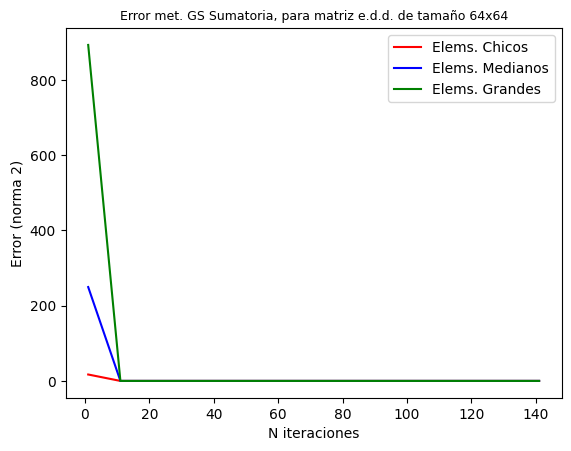

In [194]:
errores_chico = errores_gs_sum["chico"]["edd"]["64"]
errores_mediano = errores_gs_sum["mediano"]["edd"]["64"]
errores_grande = errores_gs_sum["grande"]["edd"]["64"]

its = range(1,max_iter + 1,step)

_, ax = plt.subplots()
ax.plot(its,errores_chico, c="red", label="Elems. Chicos")
ax.plot(its,errores_mediano, c="blue", label="Elems. Medianos")
ax.plot(its,errores_grande, c="green", label="Elems. Grandes")

plt.xlabel("N iteraciones")
plt.ylabel("Error (norma 2)")
plt.title("Error met. GS Sumatoria, para matriz e.d.d. de tamaño 64x64",fontsize = 9)
plt.legend()
plt.show()

### Tiempo de cómputo

### LU

### LU vs Métodos Iterativos

- Error de aproximacion entre valor actual y final (por cantidad de iteraciones) para matrices de diferentes tamaños
- Tiempo final de computo por iteraciones y por tamaño de matrices
- LU tiempo de computo por tamaño de matriz. Error numerico (comparar con x real).
- Comparar LU con todos los metodos iterativos.